In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [87]:
my_filepath = "dataset/dc-wikia-data.csv"
my_data = pd.read_csv(my_filepath, index_col="page_id")
my_data.head(3)

,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
page_id,,,,,,,,,,,,
1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0


In [88]:
#работа с id
my_data["ID"] = my_data["ID"].fillna("Identity Unknown")
my_data["ID"] = my_data["ID"].replace("Identity Unknown", "Unknown Identity")
my_data["ID"] = my_data["ID"].apply(lambda x: x.split()[0])

In [89]:
my_data["ALIGN"] = my_data["ALIGN"].fillna("Unknown Unknown")
my_data["ALIGN"] = my_data["ALIGN"].apply(lambda x: x.split()[0])


In [90]:
my_data.loc[my_data[my_data["EYE"] == 'Auburn Hair'].index, "HAIR"] = my_data.loc[my_data[my_data["EYE"] == 'Auburn Hair'].index, "EYE"] 

In [91]:
my_data["EYE"] = my_data["EYE"].fillna("Unknown Eyes")
my_data["EYE"] = my_data["EYE"].replace("Auburn Hair", "Unknown Eyes")
my_data["EYE"] = my_data["EYE"].apply(lambda x: x.split()[0])


In [92]:
my_data["HAIR"] = my_data["HAIR"].fillna("Unknown Hair")
my_data["HAIR"] = my_data["HAIR"].replace("Reddish Brown Hair", "Brown Hair")
my_data["HAIR"] = my_data["HAIR"].replace("Platinum Blond Hair", "Blond Hair")
my_data["HAIR"] = my_data["HAIR"].apply(lambda x: x.split()[0])

In [93]:
my_data["SEX"] = my_data["SEX"].fillna("Unknown Characters")
my_data["SEX"] = my_data["SEX"].apply(lambda x: x.split()[0])

In [94]:
my_data["ALIVE"] = my_data["ALIVE"].fillna("Unknown Characters") 
my_data["ALIVE"] = my_data["ALIVE"].apply(lambda x: x.split()[0])

In [95]:
my_data["GSM"] = my_data["GSM"].fillna("Unknown Characters")
my_data["GSM"] = my_data["GSM"].apply(lambda x: x.split()[0])
my_data["GSM"].unique()

array(['Unknown', 'Bisexual', 'Homosexual'], dtype=object)

In [96]:
import numpy as np
def get_month(text):
    if type(text) == np.nan:
        return "Unknown"
    elif type(text) != str:
        return "Problem"

    split_text = text.split(",")
    if len(split_text) == 2:
        return split_text[1]
    else:
        return "Unknown"
        

my_data["MONTH"] = my_data["FIRST APPEARANCE"].map(lambda x: get_month(x))

my_data = my_data.drop("FIRST APPEARANCE", axis=1)

In [97]:
"""
def get_supername(text):
    if type(text) == np.nan:
        return "Unknown"
    elif type(text) != str:
        return "Problem"

    split_text = text.split("(")
    if len(split_text) == 2:
        return split_text[0]
    else:
        return "Unknown"
    
my_data["supername"] = my_data["name"].map(lambda x: get_supername(x))
"""

'\ndef get_supername(text):\n    if type(text) == np.nan:\n        return "Unknown"\n    elif type(text) != str:\n        return "Problem"\n\n    split_text = text.split("(")\n    if len(split_text) == 2:\n        return split_text[0]\n    else:\n        return "Unknown"\n\nmy_data["supername"] = my_data["name"].map(lambda x: get_supername(x))\n'

In [98]:
"""
def get_humanname(text):
    if type(text) == np.nan:
        return "Unknown"
    elif type(text) != str:
        return "Problem"

    split_text = text.split("(")
    if len(split_text) == 2:
        return split_text[1][:-1]
    else:
        return "Unknown"
    
my_data["humanname"] = my_data["name"].map(lambda x: get_humanname(x))
"""

'\ndef get_humanname(text):\n    if type(text) == np.nan:\n        return "Unknown"\n    elif type(text) != str:\n        return "Problem"\n\n    split_text = text.split("(")\n    if len(split_text) == 2:\n        return split_text[1][:-1]\n    else:\n        return "Unknown"\n\nmy_data["humanname"] = my_data["name"].map(lambda x: get_humanname(x))\n'

In [99]:
"""
excepciton_in_name = my_data[my_data["supername"] == "Unknown"]
my_data = my_data.drop(excepciton_in_name.index)
"""

'\nexcepciton_in_name = my_data[my_data["supername"] == "Unknown"]\nmy_data = my_data.drop(excepciton_in_name.index)\n'

In [100]:
"""
my_data = my_data.reindex(columns=[
        'supername', 'humanname', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'GSM', 'ALIVE',
        'APPEARANCES', 'YEAR', 'MONTH'
        ])
"""

"\nmy_data = my_data.reindex(columns=[\n        'supername', 'humanname', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'GSM', 'ALIVE',\n        'APPEARANCES', 'YEAR', 'MONTH'\n        ])\n"

In [101]:
"""
В столбце name разные данные, где-то это имя + вселенная, где-то имя + геройский ник
"""

'\nВ столбце name разные данные, где-то это имя + вселенная, где-то имя + геройский ник\n'

In [102]:
my_data.head()

,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR,MONTH
page_id,,,,,,,,,,,,
1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret,Good,Blue,Black,Male,Unknown,Living,3093.0,1939.0,May
23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret,Good,Blue,Black,Male,Unknown,Living,2496.0,1986.0,October
1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret,Good,Brown,Brown,Male,Unknown,Living,1565.0,1959.0,October
1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public,Good,Brown,White,Male,Unknown,Living,1316.0,1987.0,February
1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret,Good,Blue,Black,Male,Unknown,Living,1237.0,1940.0,April


<Axes: xlabel='YEAR', ylabel='Count'>

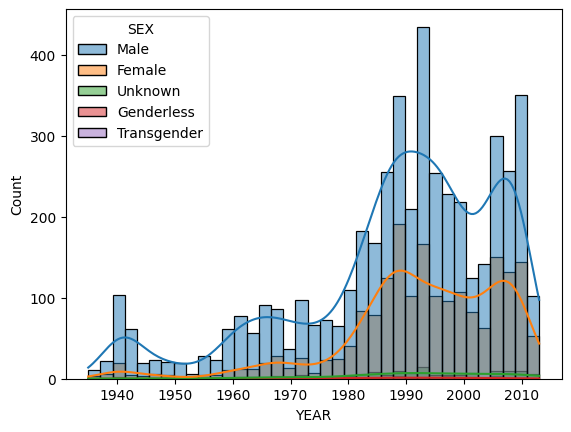

In [103]:
sns.histplot(data=my_data, x="YEAR", hue="SEX", kde=True)

<Axes: xlabel='SEX', ylabel='YEAR'>

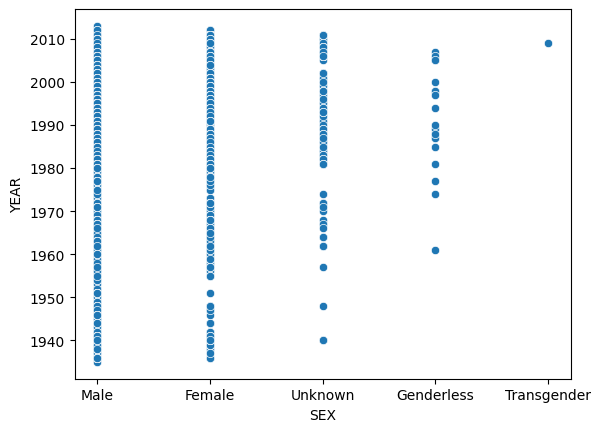

In [104]:
sns.scatterplot(y=my_data["YEAR"],  x=my_data["SEX"])

<Axes: xlabel='ALIVE', ylabel='Count'>

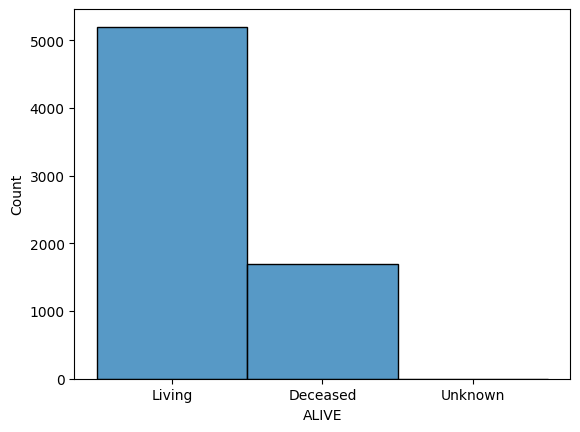

In [105]:
sns.histplot(data=my_data, x="ALIVE")

<Axes: xlabel='MONTH', ylabel='Count'>

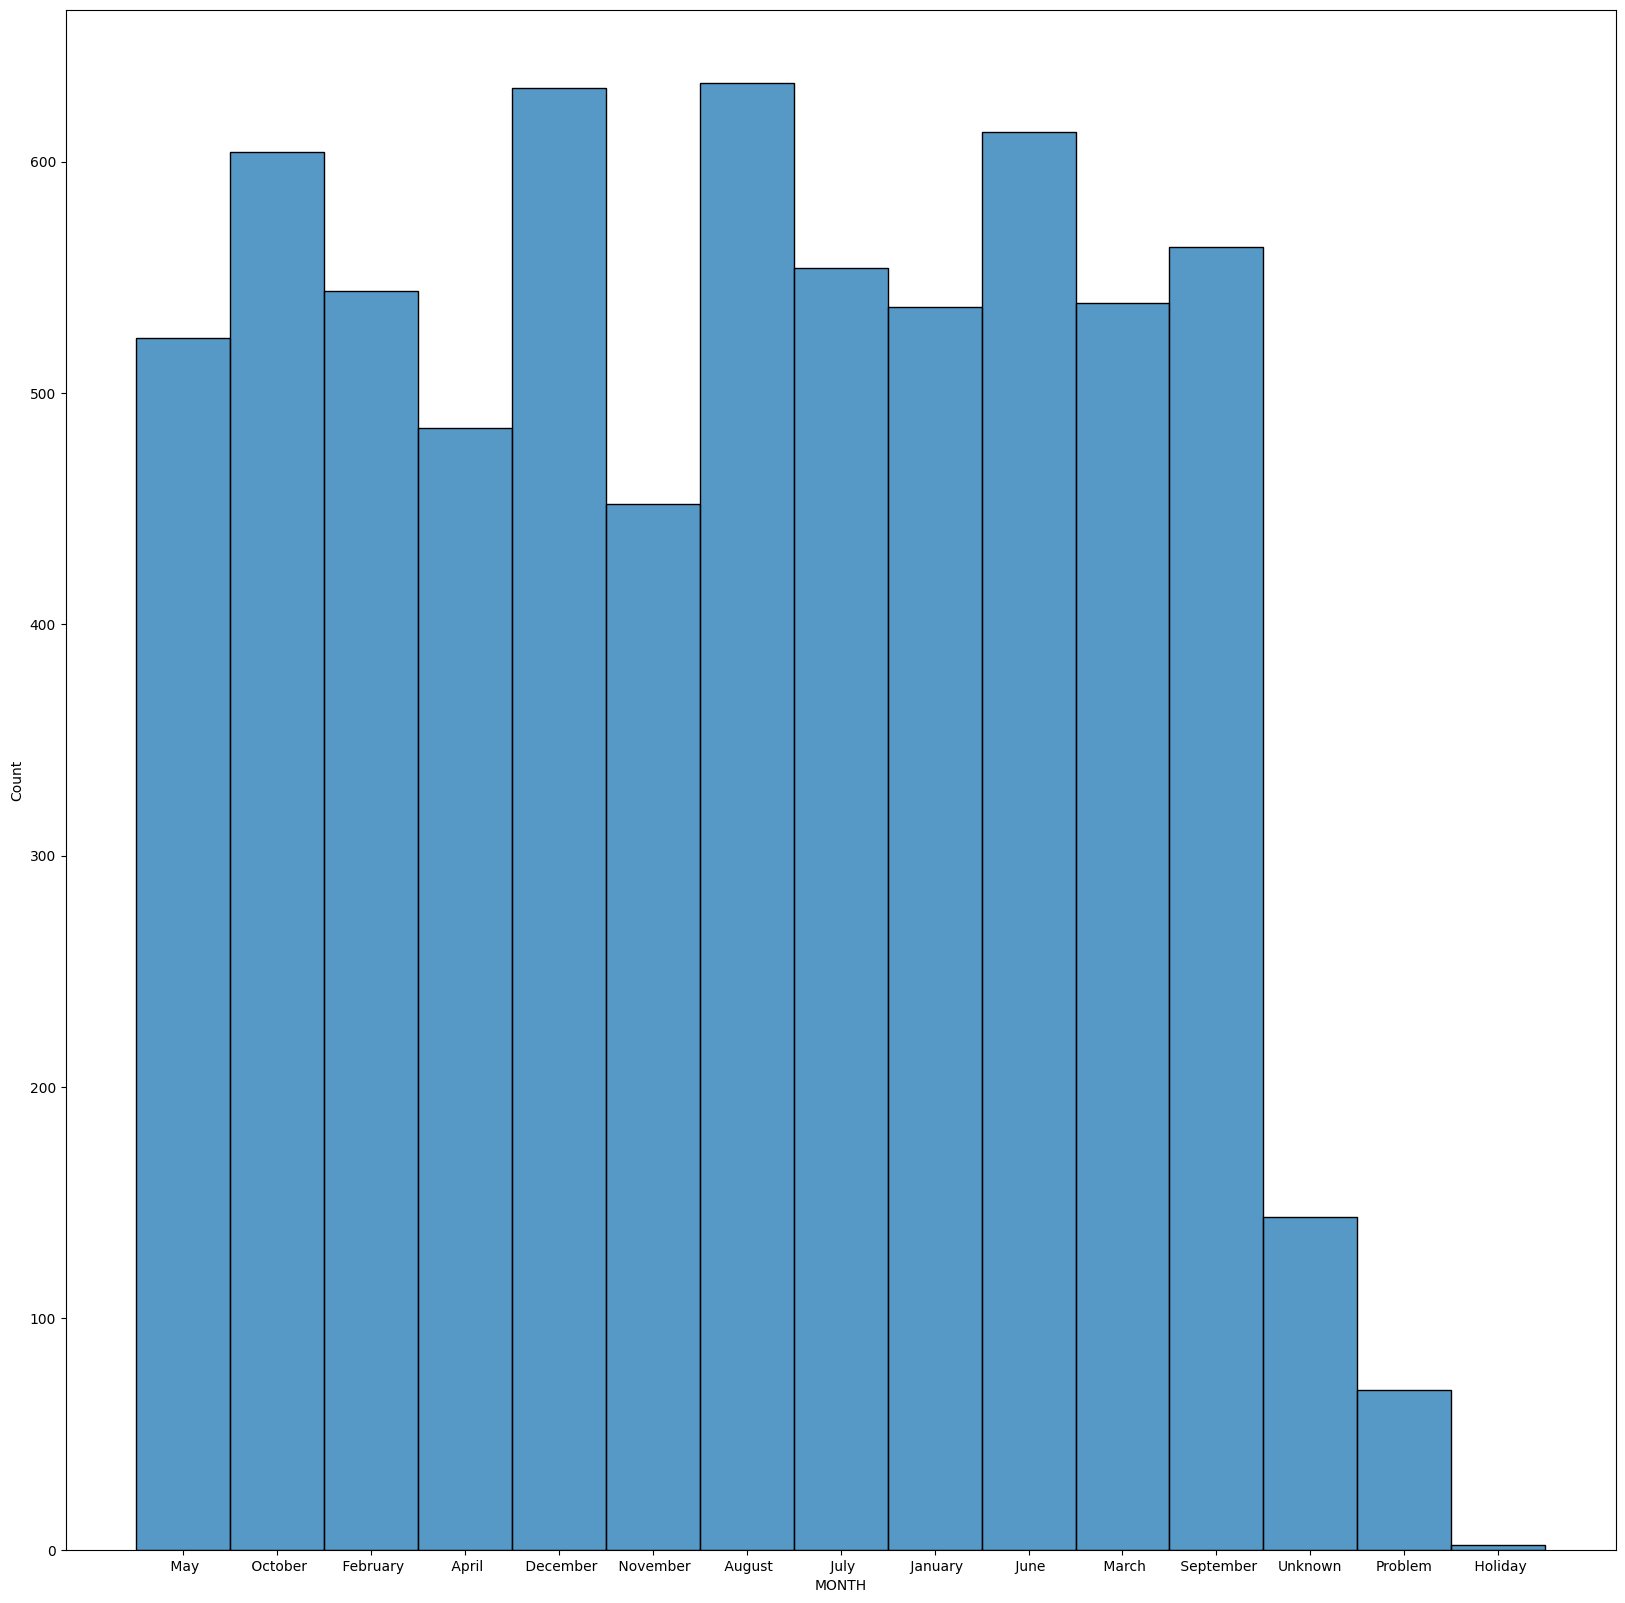

In [106]:
plt.figure(figsize=(20, 20))
sns.histplot(data=my_data, x="MONTH")

In [107]:
my_data.head(2)

,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR,MONTH
page_id,,,,,,,,,,,,
1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret,Good,Blue,Black,Male,Unknown,Living,3093.0,1939.0,May
23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret,Good,Blue,Black,Male,Unknown,Living,2496.0,1986.0,October


<Axes: xlabel='ALIGN', ylabel='Count'>

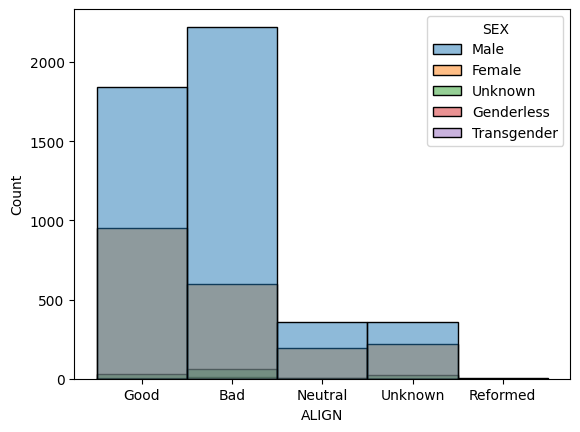

In [108]:
sns.histplot(data=my_data, x="ALIGN", hue="SEX")
#У плохих больше мужчин

<Axes: xlabel='ALIGN', ylabel='Count'>

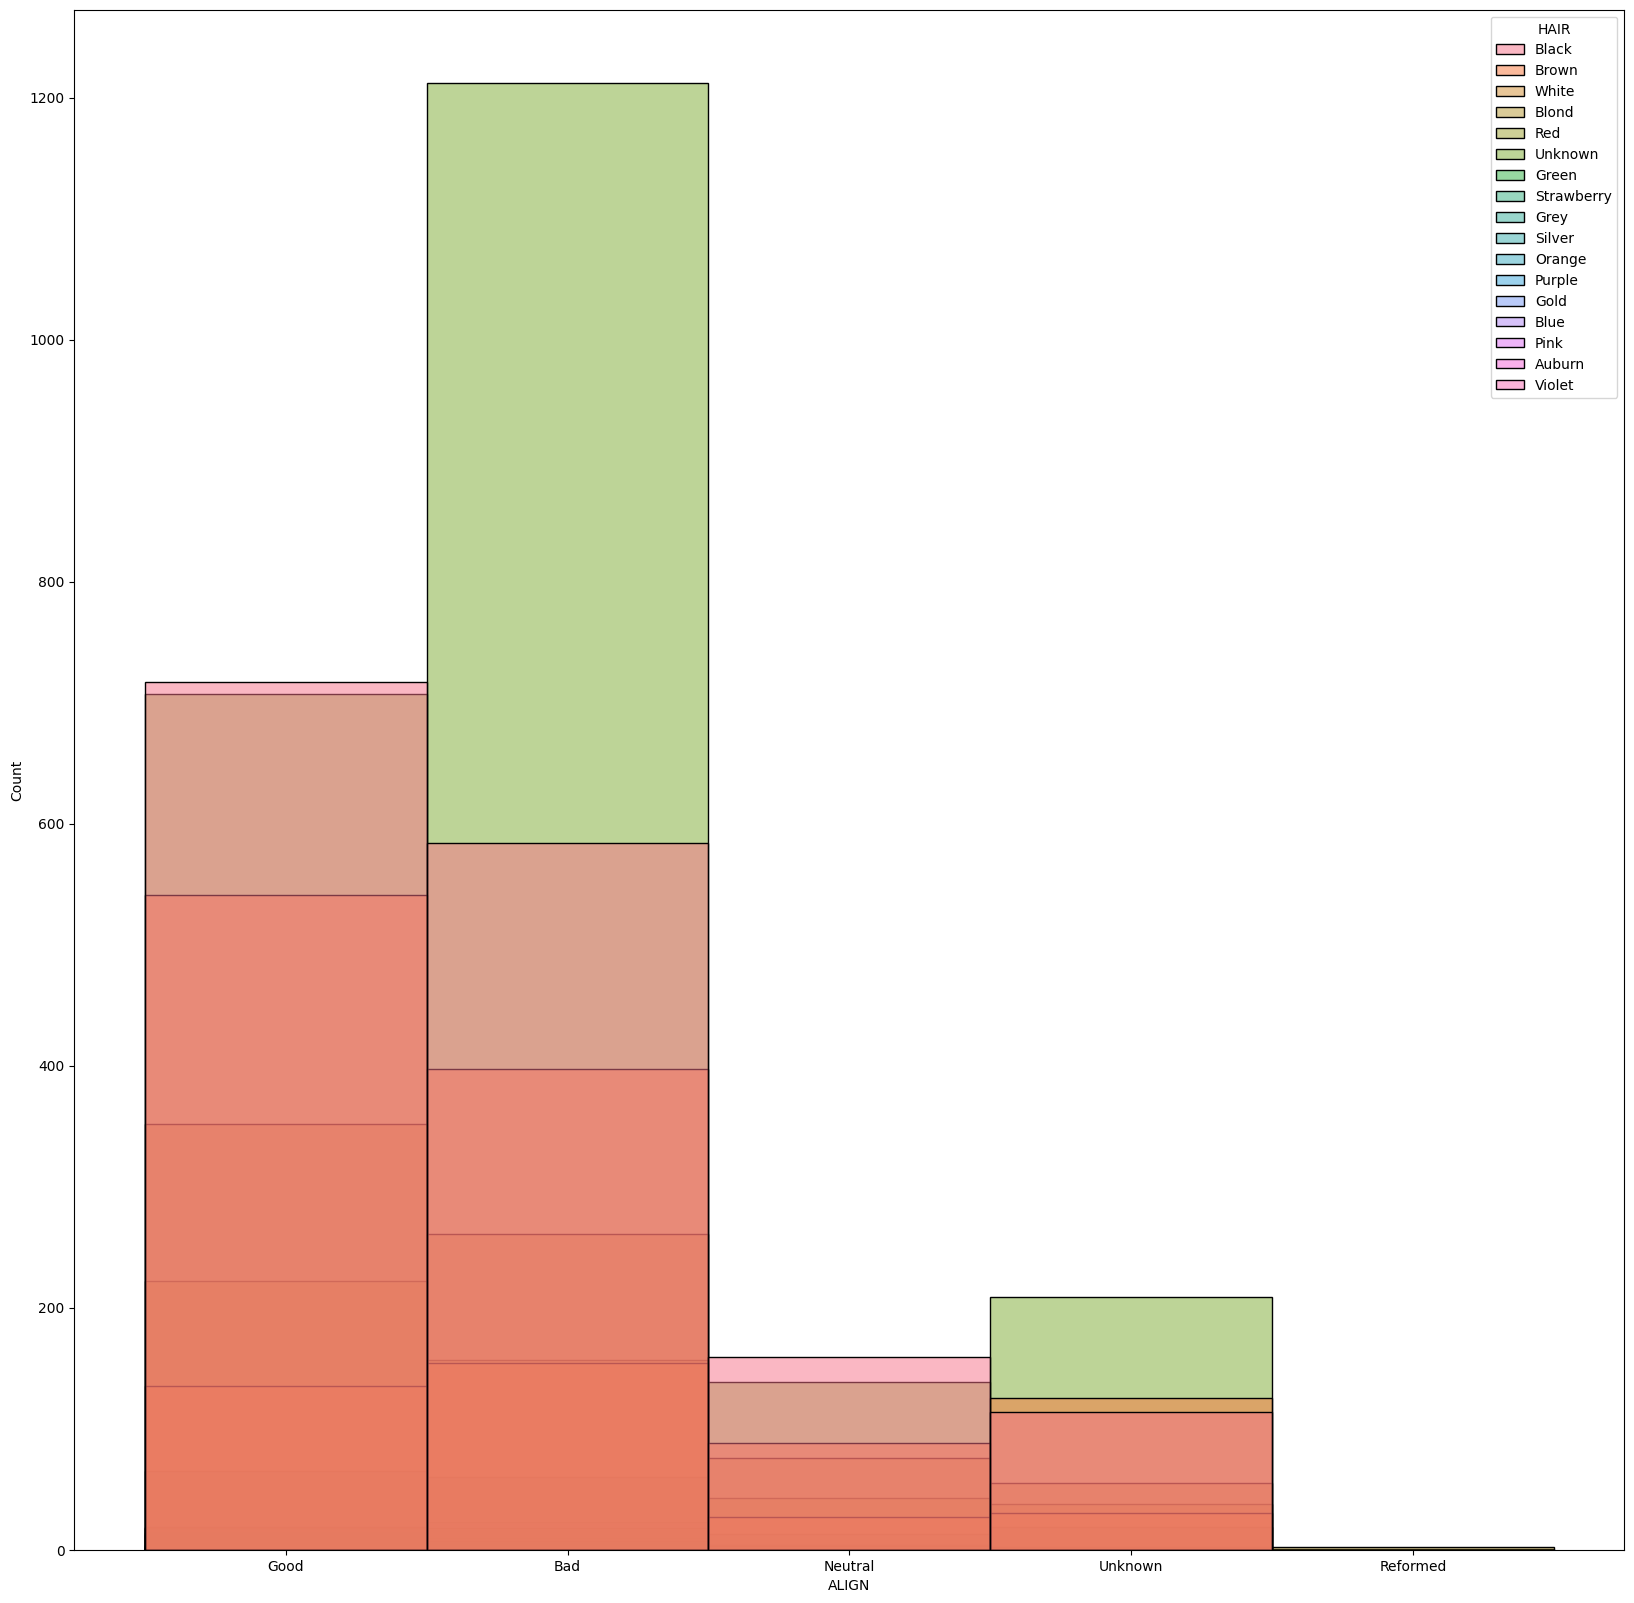

In [109]:
plt.figure(figsize=(20, 20))
sns.histplot(data=my_data, x="ALIGN", hue="HAIR")

<Axes: xlabel='HAIR', ylabel='Count'>

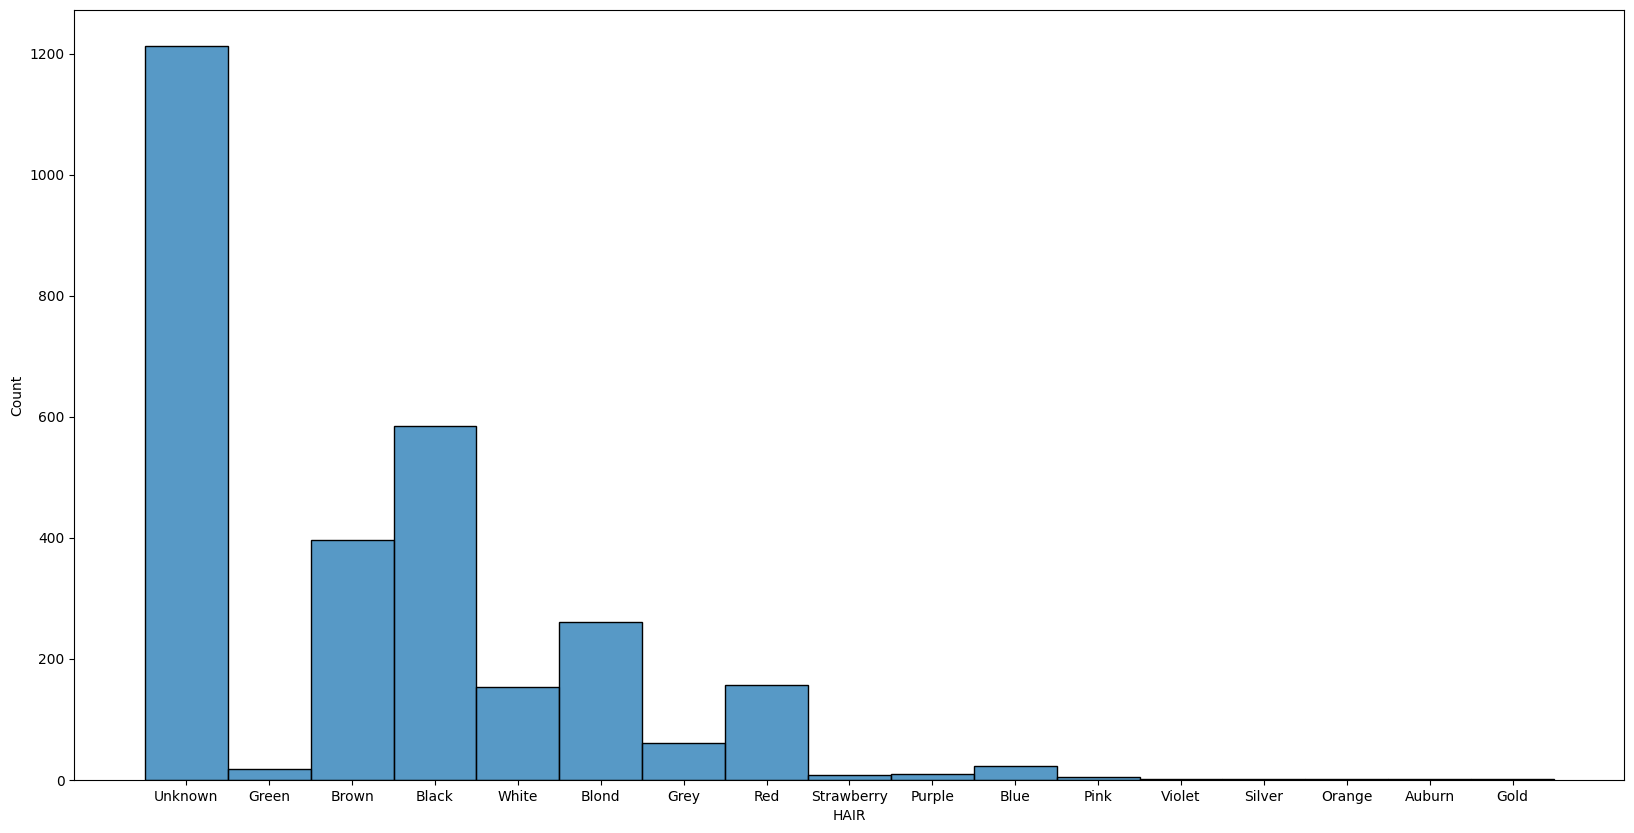

In [110]:
bad = my_data[my_data["ALIGN"] == "Bad"]
hair_bad = my_data.loc[bad.index, "HAIR"]
plt.figure(figsize=(20, 10))
sns.histplot(x=hair_bad)


<Axes: xlabel='HAIR', ylabel='Count'>

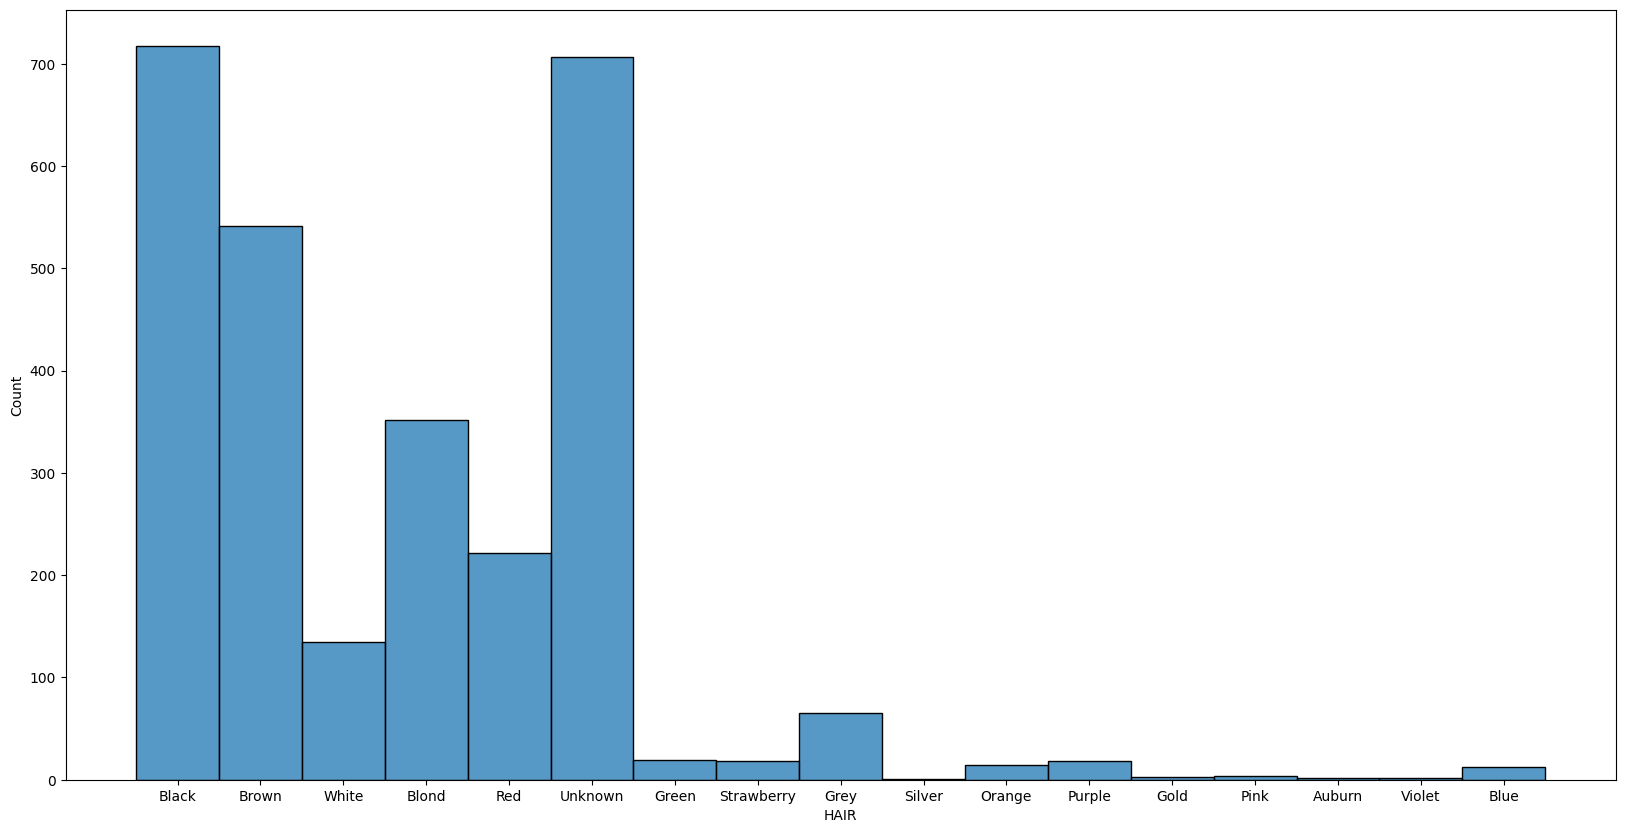

In [111]:
good = my_data[my_data["ALIGN"] == "Good"]
hair_good = my_data.loc[good.index, "HAIR"]
plt.figure(figsize=(20, 10))
sns.histplot(x=hair_good)

<Axes: xlabel='HAIR', ylabel='Count'>

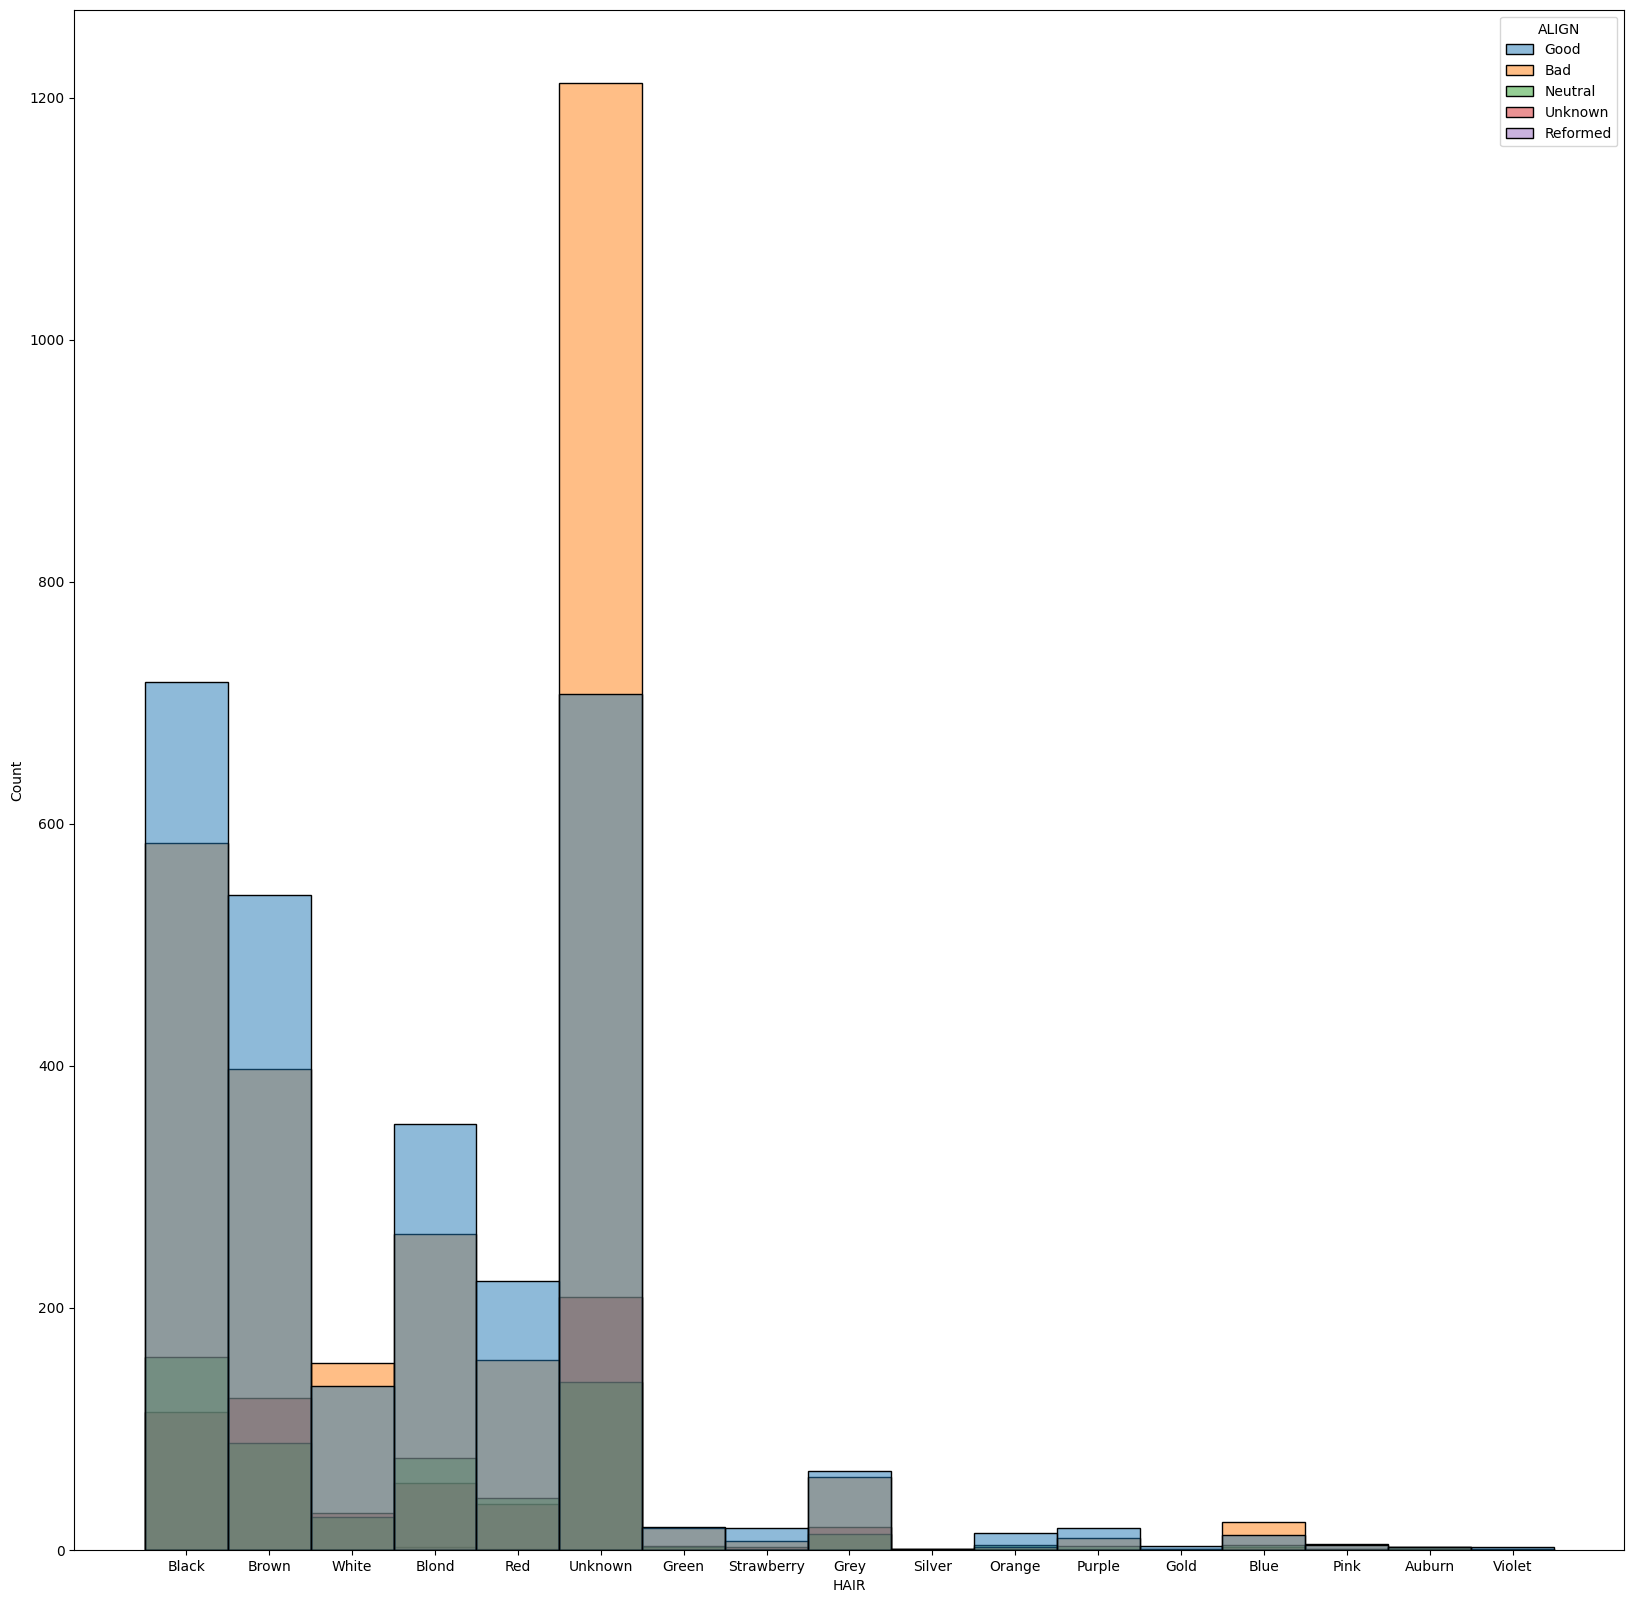

In [112]:
plt.figure(figsize=(20, 20))
sns.histplot(data=my_data, x="HAIR", hue="ALIGN")
#у злодеев чаще неизвестный цвет волос

<Axes: xlabel='EYE', ylabel='Count'>

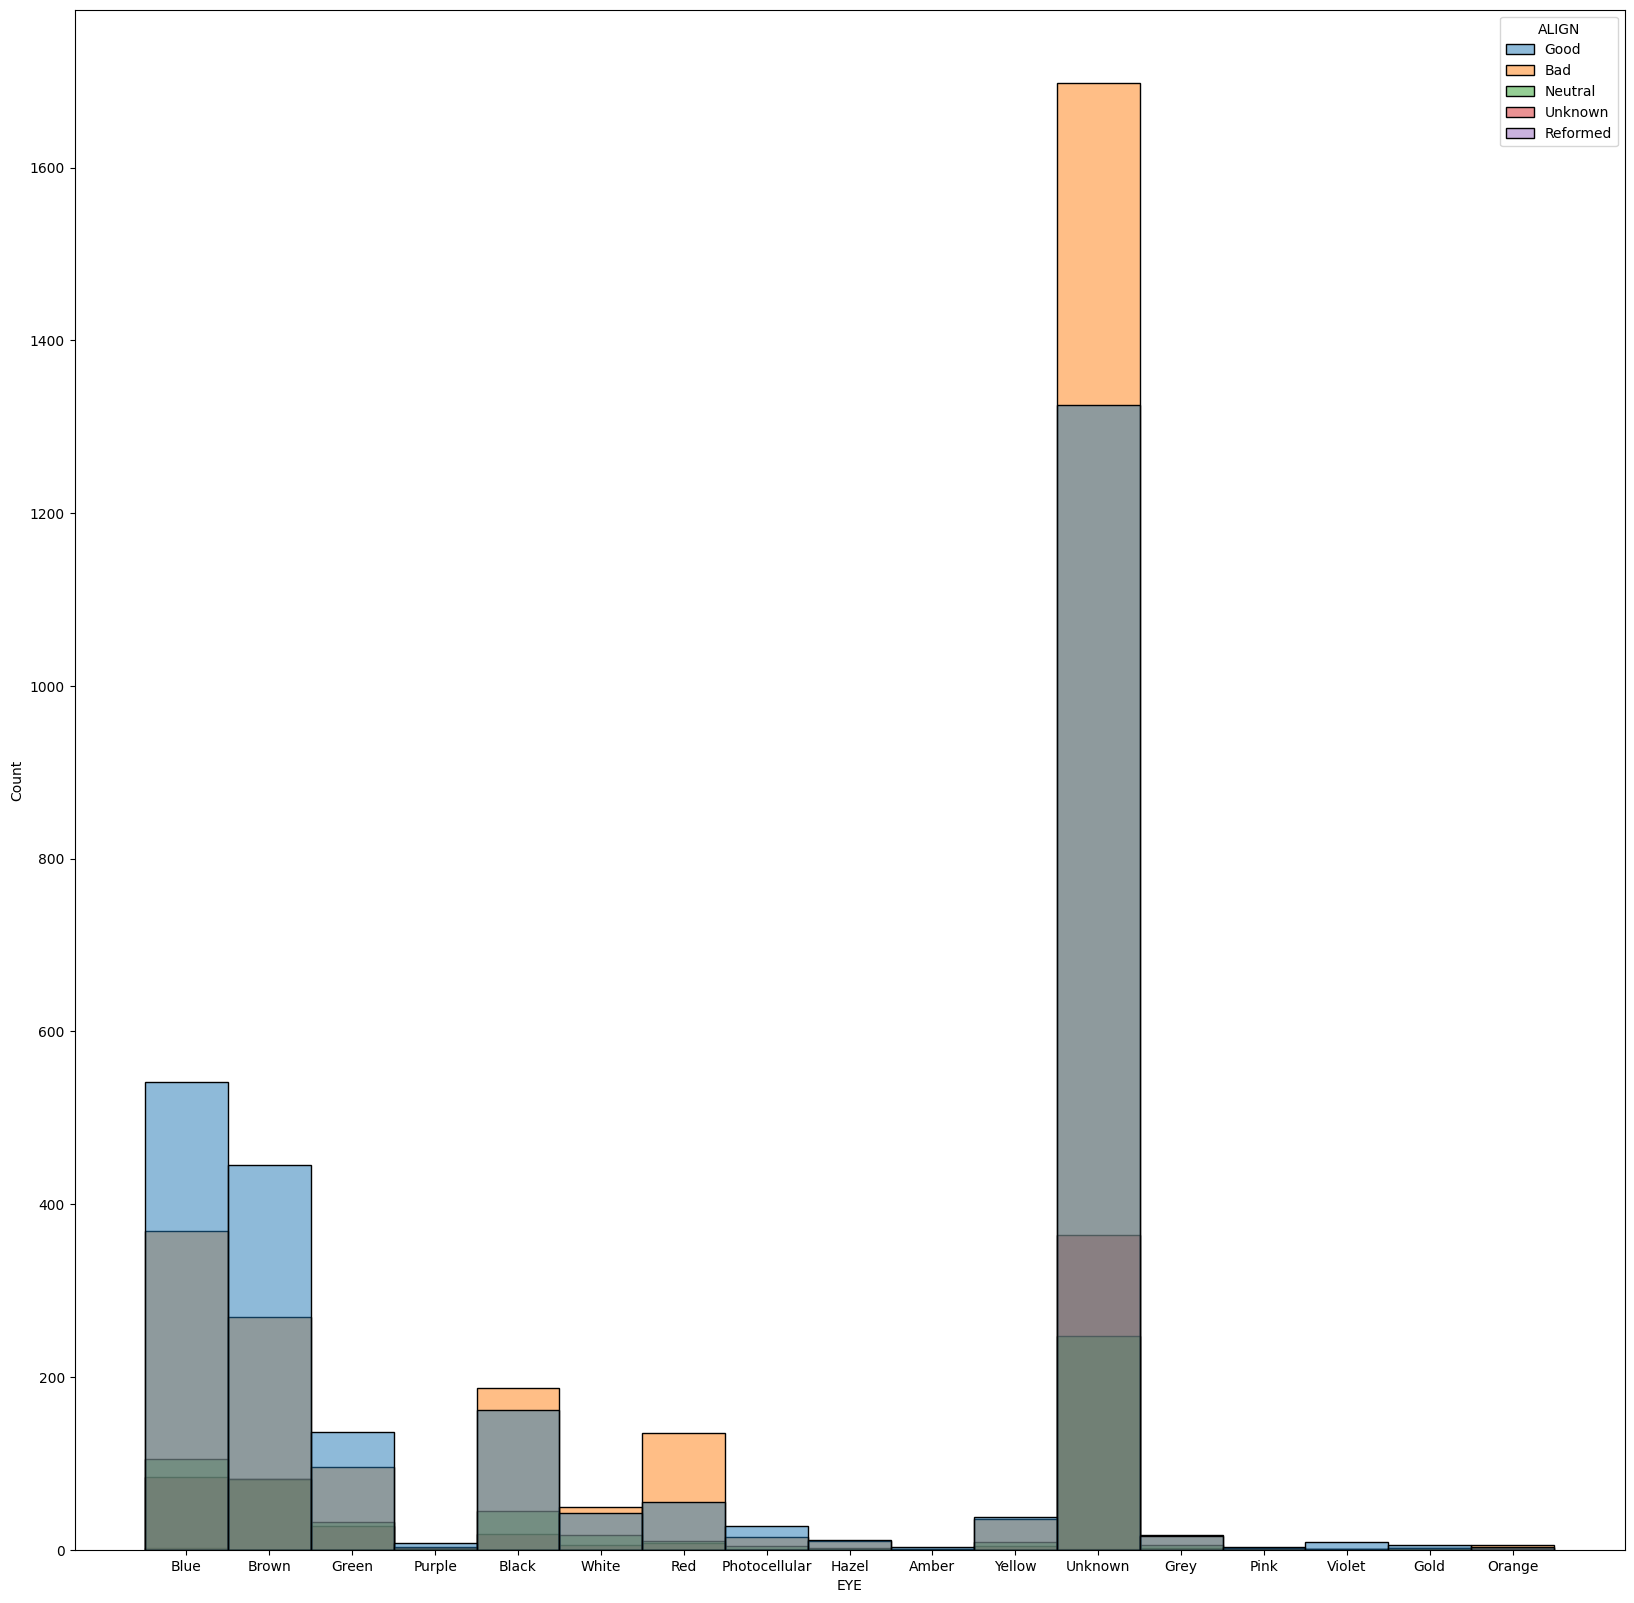

In [113]:
plt.figure(figsize=(20, 20))
sns.histplot(data=my_data, x="EYE", hue="ALIGN")

<Axes: xlabel='YEAR', ylabel='APPEARANCES'>

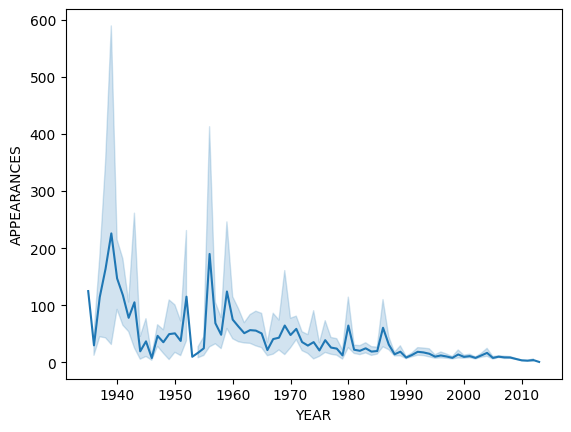

In [114]:
sns.lineplot(data=my_data, x="YEAR", y="APPEARANCES")

<Axes: xlabel='YEAR', ylabel='Count'>

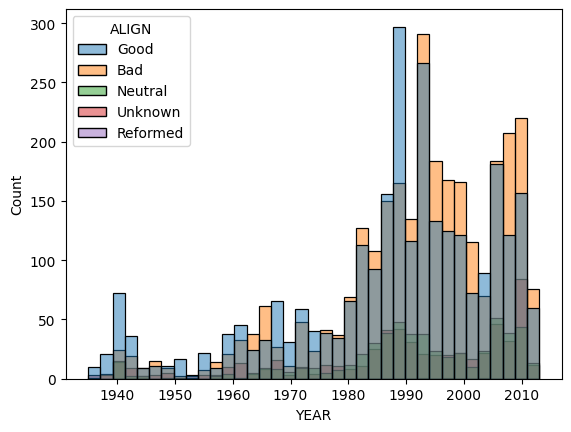

In [115]:
sns.histplot(x=my_data["YEAR"], hue=my_data["ALIGN"])
#с 1944 по 1944 каждый год кроме 88-90 появляется одинаковое количество и героев и злодеев +-, потом плоъиъ стало больше

In [116]:
my_data.groupby("ALIGN")["APPEARANCES"].mean()

ALIGN
Bad         10.579662
Good        37.207638
Neutral     21.406534
Reformed    29.666667
Unknown     23.816254
Name: APPEARANCES, dtype: float64

In [117]:
bad = my_data[my_data["ALIGN"] == "Bad"].index
app_bad = my_data.loc[bad, "APPEARANCES"]

<Axes: xlabel='APPEARANCES', ylabel='Count'>

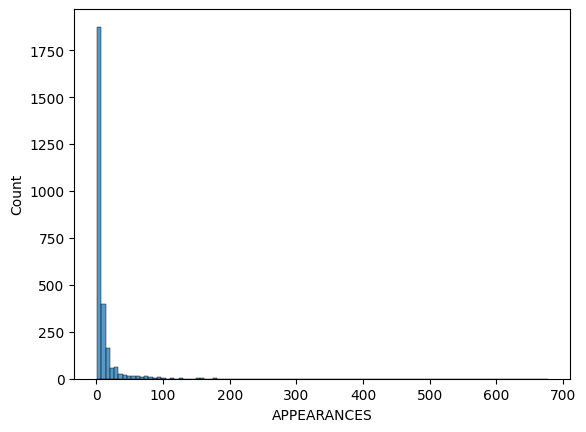

In [118]:
sns.histplot(x=app_bad)

<Axes: xlabel='APPEARANCES', ylabel='Count'>

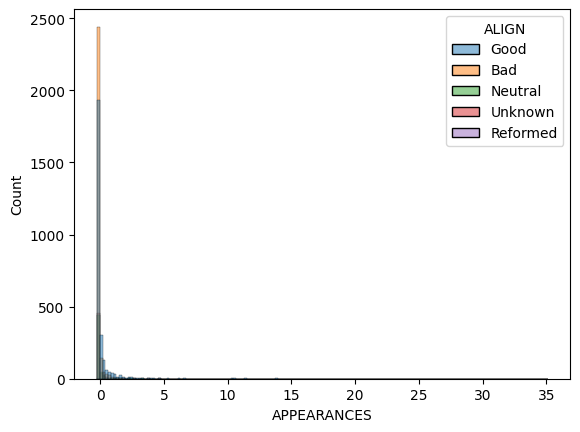

In [119]:
norm = (my_data["APPEARANCES"] - my_data["APPEARANCES"].mean()) / my_data["APPEARANCES"].std()
sns.histplot(x=norm, hue=my_data["ALIGN"])

In [ ]:
my_data.isnull